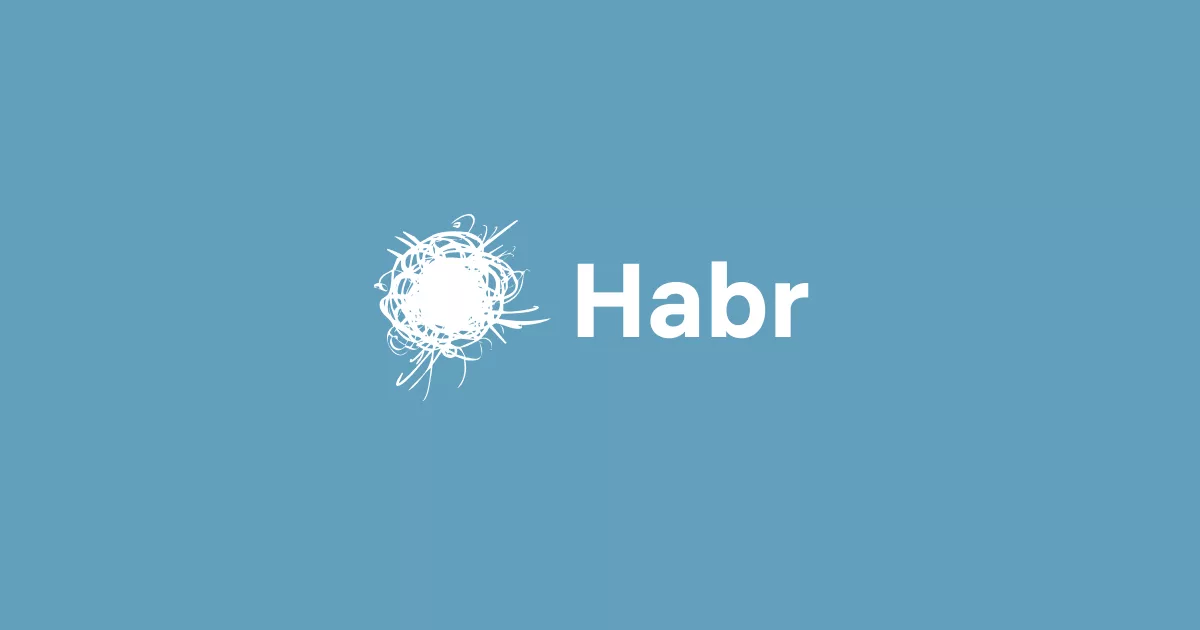


## Введение
Хабр - популярная российская платформа для публикации технических и научных статей, привлекающая большое сообщество читателей и авторов. Понимание характеристик и паттернов, присущих постам на этой платформе, может быть полезно как для авторов, стремящихся улучшить охват своего контента, так и для самой платформы в плане оптимизации рекомендательных систем и пользовательского опыта.

В этом проекте я провожу всесторонний анализ данных о постах, опубликованных на Хабре. Я использую методы обработки данных, визуализации и статистического моделирования для исследования различных аспектов этих постов, включая их тематику, популярность, временные характеристики и многое другое.

## Данные
Для этого проекта я собрал данные о постах на Хабре, включая такие атрибуты, как ссылку на пост, дату публикации, количество просмотров, оценок, комментариев, теги, дату публикации и т.д. Исходные данные были получены из публичных источников и представлены в виде CSV-файла.

## Методы
В ходе исследования я применил следующие основные методы:

1. Обработка пропусков: Я проанализировал данные на наличие пропущенных значений и применил соответствующие методы для их заполнения или удаления, в зависимости от контекста.

2. Преобразование данных: Для удобства дальнейшего анализа я преобразовал столбцы данных к более подходящим типам и форматам. Например, привел даты публикации к единому формату.

3. Визуализация данных: Используя библиотеки визуализации, такие как Matplotlib и Seaborn, я создал различные графики и диаграммы, помогающие лучше понять структуру и распределение данных.

4. Проверка нормальности: Перед применением статистических методов я проверил, следуют ли ключевые показатели постов нормальному распределению. Это помогло мне выбрать подходящие статистические тесты.

5. Проверка гипотез: На основе визуального анализа и предварительных исследований я сформулировал несколько гипотез относительно характеристик постов. Затем я применил соответствующие статистические тесты для проверки этих гипотез.

## Выводы
Этот проект демонстрирует мои навыки в области обработки, анализа и визуализации данных, а также применения статистических методов для извлечения ценных инсайтов из сложных наборов данных. Я надеюсь, что результаты этого исследования будут полезны как для авторов, так и для платформы Хабр.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Изучение данных

In [ ]:
habr_data = pd.read_csv('/content/drive/MyDrive/howpop_train.csv')

In [ ]:
habr_data = habr_data.drop_duplicates()

In [ ]:
print(f"В нашем датасете содержится {habr_data.shape[0]} строк.")
print(f"В нашем датасете содержится {habr_data.shape[1]} столбцов.")

В нашем датасете содержится 134137 строк.
В нашем датасете содержится 17 столбцов.


In [ ]:
habr_data.columns

Index(['url', 'domain', 'post_id', 'published', 'author', 'flow', 'polling',
       'content_len', 'title', 'comments', 'favs', 'views', 'votes_plus',
       'votes_minus', 'views_lognorm', 'favs_lognorm', 'comments_lognorm'],
      dtype='object')

In [ ]:
habr_data.head(3)

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,views_lognorm,favs_lognorm,comments_lognorm
0,https://habrahabr.ru/post/18284/,habrahabr.ru,18284,2008-01-01 18:19:00,@Tapac,develop,False,4305,Новогодний подарок блоггерам — WordPress 2.3.2,0,0,236,0.0,0.0,-0.792687,-1.344075,-2.436871
1,https://habrahabr.ru/post/18285/,habrahabr.ru,18285,2008-01-01 18:30:00,@DezmASter,design,False,7344,"Сумасшедшие яйца, или сервис для отслеживания ...",1,1,353,1.0,0.0,-0.485214,-0.831946,-1.873193
2,https://habrahabr.ru/post/18286/,habrahabr.ru,18286,2008-01-01 18:34:00,@DezmASter,design,False,8431,"Сумасшедшие яйца, или сервис для отслеживания ...",47,72,1200,45.0,5.0,0.446090,1.794023,0.574656


**Пометка, за что отвечает интересующие меня столбцы:**
* flow - направление
* polling - голосование (T/F)
* content_len - размерность статьи (символы)
* favs - добавления в избранное
* votes_plus - это количество положительных голосов, отданных за комментарий или публикацию. Когда пользователь ставит "плюс" (поднимает рейтинг), увеличивается значение votes_plus.
* votes_minus - это количество отрицательных голосов, поставленных пользователями. Когда пользователь ставит "минус" (понижает рейтинг), увеличивается значение votes_minus.

In [ ]:
habr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134137 entries, 0 to 134136
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   url               134137 non-null  object 
 1   domain            134137 non-null  object 
 2   post_id           134137 non-null  int64  
 3   published         134137 non-null  object 
 4   author            97657 non-null   object 
 5   flow              97048 non-null   object 
 6   polling           134137 non-null  bool   
 7   content_len       134137 non-null  int64  
 8   title             134137 non-null  object 
 9   comments          134137 non-null  int64  
 10  favs              134137 non-null  int64  
 11  views             134137 non-null  int64  
 12  votes_plus        133566 non-null  float64
 13  votes_minus       133566 non-null  float64
 14  views_lognorm     134137 non-null  float64
 15  favs_lognorm      134137 non-null  float64
 16  comments_lognorm  13

Заметим, что что столбец *published* хранит в себе дату, но имеет строквый тип данных, исправим это чуть позже.

In [ ]:
habr_data.describe()

,post_id,content_len,comments,favs,views,votes_plus,votes_minus,views_lognorm,favs_lognorm,comments_lognorm
count,134137.000000,134137.000000,134137.000000,134137.000000,1.341370e+05,133566.000000,133566.000000,134137.000000,134137.000000,134137.000000
mean,181307.054265,7516.929699,39.625994,71.999866,1.663101e+04,35.536888,8.050035,0.004849,0.003402,-0.003675
std,81766.350702,8724.771640,62.398958,145.854135,3.147982e+04,42.461073,11.398282,1.002158,1.002778,1.005259
min,18284.000000,1.000000,0.000000,0.000000,3.000000e+00,0.000000,0.000000,-6.615254,-4.137662,-4.161967
25%,115565.000000,2179.000000,7.000000,8.000000,2.100000e+03,11.000000,2.000000,-0.706552,-0.695780,-0.633775
50%,182666.000000,4949.000000,19.000000,27.000000,7.600000e+03,22.000000,5.000000,-0.020934,0.007022,0.072082
75%,257401.000000,9858.000000,48.000000,78.000000,1.870000e+04,45.000000,10.000000,0.682689,0.708778,0.697072
max,314088.000000,352471.000000,2266.000000,8718.000000,1.730000e+06,1466.000000,445.000000,5.182821,4.872866,3.900973


# Обработка пропусков

In [ ]:
habr_data.isnull().sum()

,0
url,0
domain,0
post_id,0
published,0
author,36480
flow,37089
polling,0
content_len,0
title,0
comments,0


Подмечу, что среди столбцов есть пропущенные значения. В колонках *author*, *flow* их больше всего, начнем с них. Если просто удалим пропущенные значения, то потеряем ~ 37% данных. Поэтому, пропуски заполним значением "Unknown".


In [ ]:
habr_data['author'] = habr_data['author'].fillna('Unknown')
habr_data['flow'] = habr_data['flow'].fillna('Unknown')

In [ ]:
habr_data[habr_data['author'] == 'Unknown'].tail(2)

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,views_lognorm,favs_lognorm,comments_lognorm
134125,https://habrahabr.ru/company/3cx/blog/314074/,habrahabr.ru,314074,2016-10-31 19:36:00,Unknown,admin,False,4052,Выпущена 3CX Phone System V15 SP3 и интеграция...,2,6,865,7.0,1.0,-2.514194,-2.034175,-0.995433
134132,https://habrahabr.ru/company/mailru/blog/314014/,habrahabr.ru,314014,2016-10-31 21:45:00,Unknown,develop,False,56033,Парсинг JSON — это минное поле,58,347,35500,164.0,6.0,1.870174,2.124862,1.258447


In [ ]:
habr_data[habr_data['flow'] == 'Unknown'].tail(2)

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,views_lognorm,favs_lognorm,comments_lognorm
134134,https://geektimes.ru/post/282090/,geektimes.ru,282090,2016-10-31 23:26:00,@Shapelez,Unknown,False,2883,Арзамасский городской суд постановил заблокиро...,16,14,15800,28.0,4.0,0.198924,-0.656390,-0.408714
134135,https://geektimes.ru/post/282092/,geektimes.ru,282092,2016-10-31 23:52:00,@ragequit,Unknown,False,5735,Медиа-коммуникационный союз планирует внести в...,47,14,15000,20.0,0.0,0.124244,-0.655385,0.389636


In [ ]:
print(f"В столбце 'flow' на данный момент {habr_data['flow'].isnull().sum()} пропусков.")
print(f"В столбце 'author' на данный момент {habr_data['author'].isnull().sum()} пропусков.")

В столбце 'flow' на данный момент 0 пропусков.
В столбце 'author' на данный момент 0 пропусков.


Отлично, с пропусками по столбцам *flow, author* справились, но у нас есть еще колонки, с которыми мы обязаны поработать. Оставлись столбцы: *votes_plus, votes_minus*. Заполню их медианным значением.

In [ ]:
votes_plus_median = habr_data['votes_plus'].median()
votes_minus_median = habr_data['votes_minus'].median()

habr_data['votes_plus'] = habr_data['votes_plus'].fillna(votes_plus_median)
habr_data['votes_minus'] = habr_data['votes_minus'].fillna(votes_minus_median)

In [ ]:
print(f"Пропуски в столбце votes_plus были заменены на {votes_plus_median}, а в столбце votes_minus на {votes_minus_median}, т.е на медианные значения.")

Пропуски в столбце votes_plus были заменены на 22.0, а в столбце votes_minus на 5.0, т.е на медианные значения.


In [ ]:
print(f"В столбце 'votes_plus' на данный момент {habr_data['votes_plus'].isnull().sum()} пропусков.")
print(f"В столбце 'votes_minus' на данный момент {habr_data['votes_minus'].isnull().sum()} пропусков.")

В столбце 'votes_plus' на данный момент 0 пропусков.
В столбце 'votes_minus' на данный момент 0 пропусков.


In [ ]:
habr_data.isnull().sum()

,0
url,0
domain,0
post_id,0
published,0
author,0
flow,0
polling,0
content_len,0
title,0
comments,0


# Преобразование столбцов к удобному виду для дальнейшей работы

Давайте попробуем создать новый столбец. В него мы положим количество публикаций каждого автора.

In [ ]:
habr_data.tail(3)

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,views_lognorm,favs_lognorm,comments_lognorm
134134,https://geektimes.ru/post/282090/,geektimes.ru,282090,2016-10-31 23:26:00,@Shapelez,Unknown,False,2883,Арзамасский городской суд постановил заблокиро...,16,14,15800,28.0,4.0,0.198924,-0.656390,-0.408714
134135,https://geektimes.ru/post/282092/,geektimes.ru,282092,2016-10-31 23:52:00,@ragequit,Unknown,False,5735,Медиа-коммуникационный союз планирует внести в...,47,14,15000,20.0,0.0,0.124244,-0.655385,0.389636
134136,https://habrahabr.ru/post/314088/,habrahabr.ru,314088,2016-10-31 23:56:00,@Mgrin,develop,False,9359,mgr-forms-react: Простой компонент для простей...,4,35,3100,12.0,1.0,-1.004391,-0.290955,-0.613330


В глаза сразу бросается столбец *published*, который как мы выяснили ранее, формата string. Преобразуем данный столбцец в формат datetime.






In [ ]:
habr_data['published'] = pd.to_datetime(habr_data['published'])

In [ ]:
habr_data['published'].dt.minute # все работает.

,published
0,19
1,30
2,34
3,32
4,34
...,...
134132,45
134133,44
134134,26
134135,52


In [ ]:
habr_data.dtypes

,0
url,object
domain,object
post_id,int64
published,datetime64[ns]
author,object
flow,object
polling,bool
content_len,int64
title,object
comments,int64


Проверим колонку *content_len* на max/min значения, я думаю, что там есть выбросы.

In [ ]:
print(f"Максимальная длина контента равна {habr_data['content_len'].max()} символам.")
print(f"Минимальная длина контента равна {habr_data['content_len'].min()} символам.")

Максимальная длина коментария равна 352471 символам.
Минимальная длина коментария равна 1 символам.


In [ ]:
habr_data[habr_data['content_len'] == 352471]

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,views_lognorm,favs_lognorm,comments_lognorm
124242,https://habrahabr.ru/company/luxoft/blog/280784/,habrahabr.ru,280784,2016-04-13 17:57:00,Unknown,develop,False,352471,Шпаргалка Java-программиста 6. Список полезных...,44,981,84000,33.0,1.0,2.558483,2.794407,1.286671


In [ ]:
habr_data[habr_data['content_len'] == 1]

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,views_lognorm,favs_lognorm,comments_lognorm
15,https://habrahabr.ru/post/35218/,habrahabr.ru,35218,2008-01-04 19:04:00,@napster,develop,True,1,Кто должен писать JS код в процессе работы над...,105,1,1200,25.0,14.0,0.415985,-0.812524,1.144618
121,https://habrahabr.ru/post/35229/,habrahabr.ru,35229,2008-01-12 15:21:00,@xstb,misc,True,1,Как вы плюсуете (минусуете) пост на Хабре?,33,1,172,24.0,11.0,-1.019527,-0.801686,0.245253
160,https://geektimes.ru/post/35233/,geektimes.ru,35233,2008-01-15 01:21:00,@suckdontbite,Unknown,True,1,А как вы относитесь к рекламным роликам компан...,9,0,106,4.0,12.0,-1.408036,-1.251695,-0.521755
175,https://habrahabr.ru/post/35235/,habrahabr.ru,35235,2008-01-15 17:37:00,@Miyazaki,misc,True,1,"Хабранарод, как часто вы пользуетесь хабрапочтой",0,0,108,0.0,0.0,-1.333325,-1.259873,-2.261849
180,https://geektimes.ru/post/35236/,geektimes.ru,35236,2008-01-16 00:36:00,@porchini,Unknown,True,1,"Если у вас MacBook (Pro, Air), то пользуетесь ...",44,0,2800,13.0,11.0,1.657767,-1.239927,0.613591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62212,https://habrahabr.ru/post/163291/,habrahabr.ru,163291,2012-12-20 13:36:00,@master1981,admin,True,1,Почему вы не используете облачную инфраструкту...,46,6,5400,11.0,8.0,-0.935100,-1.212407,0.719802
62286,https://habrahabr.ru/post/163519/,habrahabr.ru,163519,2012-12-21 17:07:00,@Delka,management,True,1,Разрешено ли вам не ездить в офис и работать и...,126,10,18400,51.0,21.0,0.156567,-0.923999,1.484168
62443,https://habrahabr.ru/post/163955/,habrahabr.ru,163955,2012-12-25 22:21:00,@Leestex,misc,True,1,Готовы ли вы переехать из-за нового места работы?,251,10,23800,65.0,15.0,0.405138,-0.941177,2.037719
67123,https://habrahabr.ru/post/285056/,habrahabr.ru,285056,2013-04-17 18:14:00,@gresus,management,True,1,Какое направление развития карьеры сейчас наиб...,47,13,10500,12.0,20.0,-0.391188,-0.874417,0.778128


Ровно 937 статей на хабре предположительно, состоят из одного символа. Есть два варианта разворота событий:

* Либо пост/статья содержит только голосование, поэтому длина == 1.
* Либо пост/статья определена неверно, т.е ее длина > 1 символа.
* Лиюо пост/статья действительно содержит 1 символ.

**Давайте проверим это:**

Создадим два датасета:

Один датасет будет содержать посты с коментариями, а второй будет содержать посты без коментариев.

In [ ]:
data_polling_true = habr_data[habr_data['polling'] == True]
data_polling_false = habr_data[habr_data['polling'] == False]

Теперь возьмем случайные значение из датасета и посмотрим на результат:

In [ ]:
data_polling_true.head(1)

# Здесь в статье одно голосование, поэтому pooling == 1. -> https://habrahabr.ru/post/35218/

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,views_lognorm,favs_lognorm,comments_lognorm
15,https://habrahabr.ru/post/35218/,habrahabr.ru,35218,2008-01-04 19:04:00,@napster,develop,True,1,Кто должен писать JS код в процессе работы над...,105,1,1200,25.0,14.0,0.415985,-0.812524,1.144618


In [ ]:
data_polling_false.head(1)

# Здесь мы видим полную статью, поэтому, можем считать, что выбросы в столбце тоже существуют. -> https://habrahabr.ru/post/18284/

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,views_lognorm,favs_lognorm,comments_lognorm
0,https://habrahabr.ru/post/18284/,habrahabr.ru,18284,2008-01-01 18:19:00,@Tapac,develop,False,4305,Новогодний подарок блоггерам — WordPress 2.3.2,0,0,236,0.0,0.0,-0.792687,-1.344075,-2.436871


У нас однозначно есть выбросы, поэтому давайте воспользуемся методом **МЕЖКВАРТИЛЬНОГО РАЗМАХА** и посмотрим на выбросы с помощью визуализации.

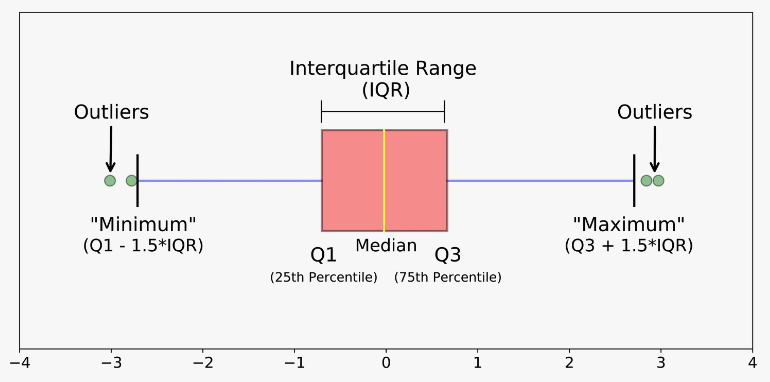

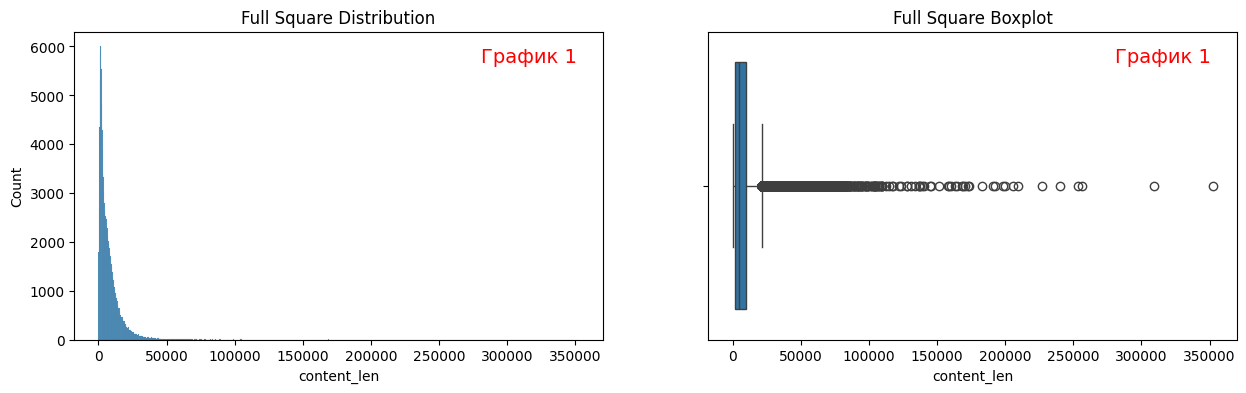

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=habr_data, x='content_len', ax=axes[0]);
histplot.set_title('Full Square Distribution');
histplot.annotate('График 1', xy=(0.95, 0.95), xycoords='axes fraction', ha='right', va='top',
                  fontsize=14, color='red')
boxplot = sns.boxplot(data=habr_data, x='content_len', ax=axes[1]);
boxplot.set_title('Full Square Boxplot');
boxplot.annotate('График 1', xy=(0.95, 0.95), xycoords='axes fraction', ha='right', va='top',
                 fontsize=14, color='red')

plt.show()

In [ ]:
def outliers_iqr(data, feature, left=1.5, right=1.5):
    x = data[feature]

    quantile_1, quantile_3 = x.quantile(0.25), x.quantile(0.75)
    iqr = quantile_3 - quantile_1

    lower_bound = quantile_1 - (left * iqr)
    upper_bound = quantile_3 + (right * iqr)

    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x <= upper_bound) & (x >= lower_bound)]

    return outliers, cleaned


In [ ]:
outliers, cleaned = outliers_iqr(habr_data, 'content_len')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 7526
Результирующее число записей: 126611


In [ ]:
habr_data = cleaned

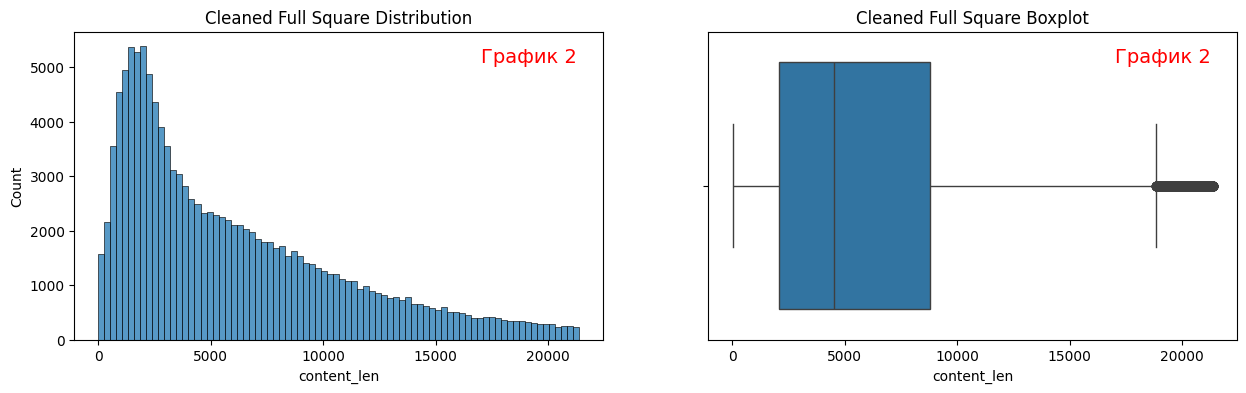

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=cleaned, x='content_len', ax=axes[0]);
histplot.set_title('Cleaned Full Square Distribution');
histplot.annotate('График 2', xy=(0.95, 0.95), xycoords='axes fraction', ha='right', va='top',
                  fontsize=14, color='red')
boxplot = sns.boxplot(data=cleaned, x='content_len', ax=axes[1]);
boxplot.set_title('Cleaned Full Square Boxplot');
boxplot.annotate('График 2', xy=(0.95, 0.95), xycoords='axes fraction', ha='right', va='top',
                 fontsize=14, color='red')

plt.show()

Как мы можем наблюдать, количество выбросов уменьшилось, данные на **Графике 2** распределены более ровно, чем на **Графике 1**.

# Визуализация, для лучшего понимания данных

In [ ]:
habr_data.head(3)

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,views_lognorm,favs_lognorm,comments_lognorm
0,https://habrahabr.ru/post/18284/,habrahabr.ru,18284,2008-01-01 18:19:00,@Tapac,develop,False,4305,Новогодний подарок блоггерам — WordPress 2.3.2,0,0,236,0.0,0.0,-0.792687,-1.344075,-2.436871
1,https://habrahabr.ru/post/18285/,habrahabr.ru,18285,2008-01-01 18:30:00,@DezmASter,design,False,7344,"Сумасшедшие яйца, или сервис для отслеживания ...",1,1,353,1.0,0.0,-0.485214,-0.831946,-1.873193
2,https://habrahabr.ru/post/18286/,habrahabr.ru,18286,2008-01-01 18:34:00,@DezmASter,design,False,8431,"Сумасшедшие яйца, или сервис для отслеживания ...",47,72,1200,45.0,5.0,0.446090,1.794023,0.574656


**Какие категории у нас вообще есть?**

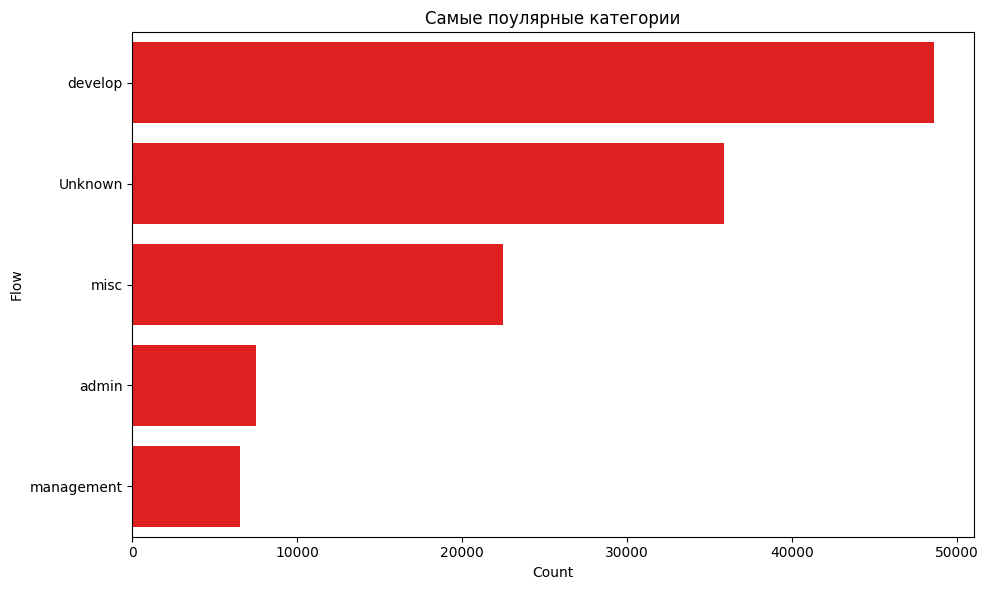

In [ ]:
visualisation = habr_data.copy()

top_flow = visualisation['flow'].value_counts().head(5)

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=top_flow.values, y=top_flow.index, orient='h', ax=ax, color='red')

ax.set_title('Самые поулярные категории')
ax.set_xlabel('Count')
ax.set_ylabel('Flow')
plt.tight_layout()
plt.show()

Исходя из полученного барплота, можно сделать вывод, что большая часть статей посвещена тематике **разработки**. Так же не трудно заметить, что авторы статей очень часто не указывают раздел темы для своих публикаций

**Какие самые популярные пользоваетли по суммарным просмотрам/комментариям/добавлениям в избранное?**

<ipython-input-90-c7a25b6046c1>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_score', y='author', data=top_authors, orient='h', palette='Reds')


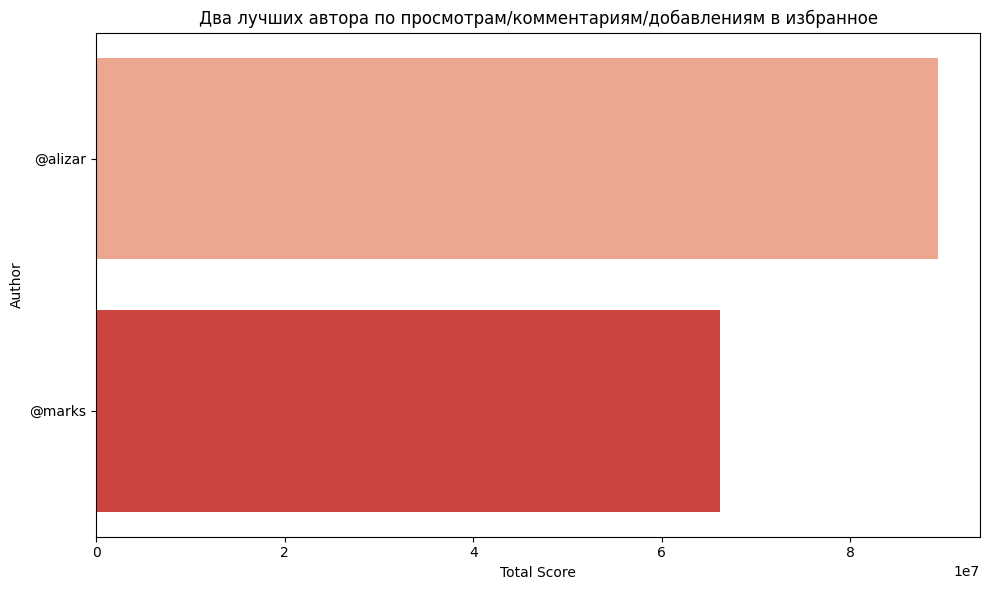

In [ ]:
data = cleaned.copy()


data = data[data['author'] != 'Unknown']


author_stats = data.groupby('author')[['views', 'comments', 'favs']].sum().reset_index()


author_stats['total_score'] = author_stats['views'] + author_stats['comments'] + author_stats['favs']


top_authors = author_stats.nlargest(2, 'total_score')


fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='total_score', y='author', data=top_authors, orient='h', palette='Reds')


ax.set_title('Два лучших автора по просмотрам/комментариям/добавлениям в избранное')
ax.set_xlabel('Total Score')
ax.set_ylabel('Author')
plt.tight_layout()
plt.show()


Вот, кстати, их аккаунты, кому интересно

1. https://habr.com/ru/users/alizar/
2. https://habr.com/ru/users/marks/

**Какова зависимость между просмотрами и комментариями/добавлением в избранное?**

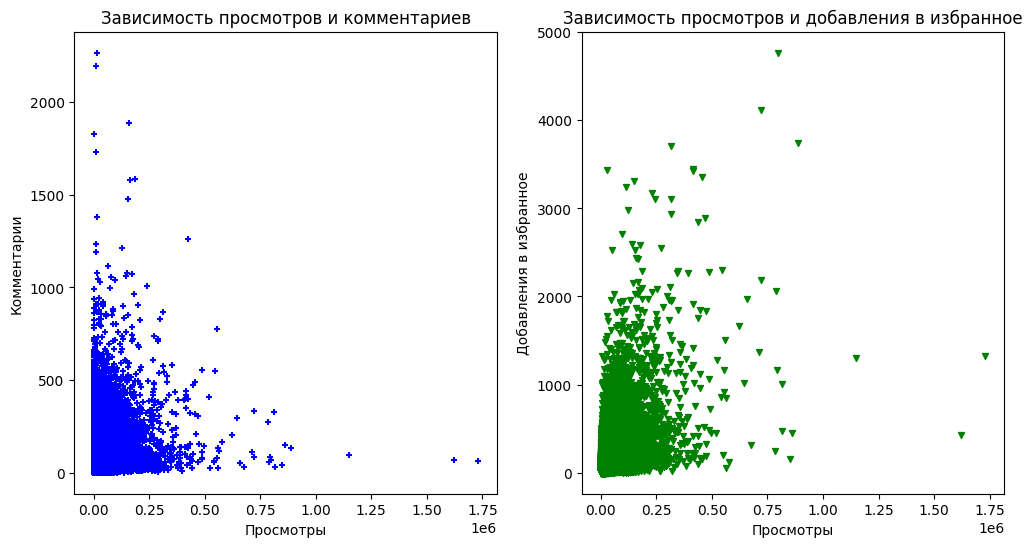

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))


ax1.scatter(habr_data["views"], habr_data["comments"], s=20, marker='+', color='blue')
ax1.set_title("Зависимость просмотров и комментариев")
ax1.set_xlabel("Просмотры")
ax1.set_ylabel("Комментарии")

ax2.scatter(habr_data["views"], habr_data["favs"], s=18, marker='v', color='green')
ax2.set_title("Зависимость просмотров и добавления в избранное")
ax2.set_xlabel("Просмотры")
ax2.set_ylabel("Добавления в избранное")

plt.show()

Большинство статей имеют количество комментариев, не превышающих 1000. В диапозоне. Поскольку значения сосредоточены в нижнем левом квадранте, это может указывать на слабую или умеренную положительную корреляцию между просмотрами и комментариями, т.е, чем больше просмотров, тем больше комментариев, но эта зависимость не очень сильная.

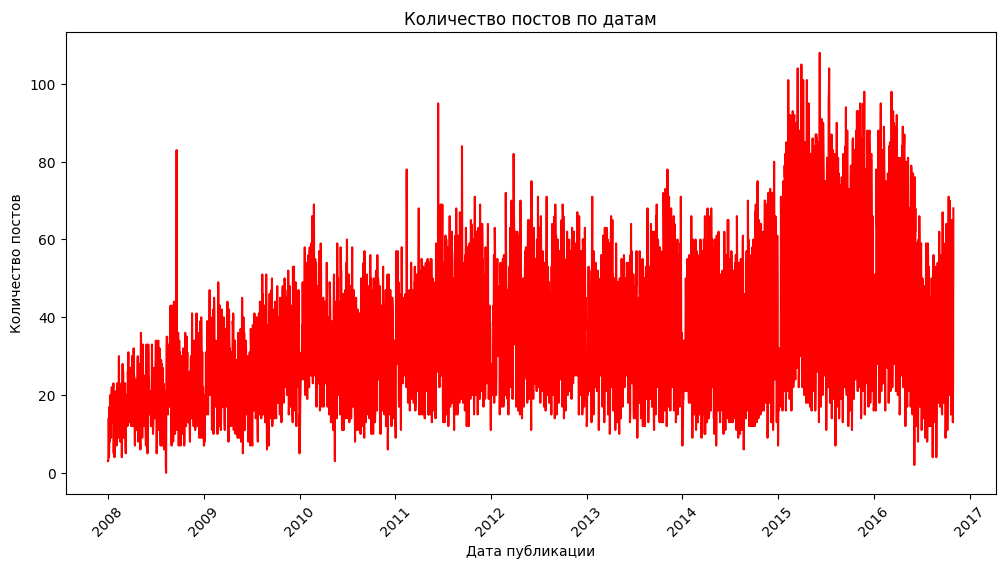

In [ ]:
vis = habr_data.groupby(pd.Grouper(key='published', freq='D')).size().reset_index(name='posts')

plt.figure(figsize=(12, 6))
sns.lineplot(x="published", y="posts", data=vis, c='red')
plt.title("Количество постов по датам")
plt.xlabel("Дата публикации")
plt.ylabel("Количество постов")
plt.xticks(rotation=45)
plt.show()

Начиная с 2008 года количество публикаций только растет. В середине 2008 произошел резкий скачек, всего скорее, это связано с тем, *что сайт «Хабр» стал финалистом в номинации «Сайт информационных технологий и телекоммуникаций» на конкурсе РОТОР.*  

Огромный прирост по количеству постов произошел в начале 2015 года. С начала 2015 года Хабр начал активно привлекать новых авторов и контент, что могло привести к увеличению количества постов. Также было изменено содержание и формат некоторых публикаций.  Политические и экономические изменения в России в 2014-2015 годах, такие как экономический кризис и рост интереса к новым технологиям и разработкам, могли способствовать увеличению интереса к ИТ и стартапам, что в свою очередь привело к увеличению постов на платформе.

В 2016 году мы можем наблюдать резкий спад по кол-ву постов, могу предположить, что это связано с тем, что в 2016 году Хабр продолжал внедрять изменения в правила публикаций и модерации контента. Это могло привести к тому, что некоторые пользователи стали меньше публиковать свои материалы или отказывались от публикаций из-за более строгих требований.




# Проверка данных на нормальность / проверка гипотез.



Для проверки данных на нормальность я могу использовать тест Shapiro-Wilk'a, либо же normaltest. Т.к два этих теста могут дать нам нужную информацию о нормалности распределения данных.

Я буду использовать тест Shapiro-Wilk'a, т.к этот тест подразумевает, что выборка будет небольшой.

Я не буду использовать другие стат. методы (ANOVA, z-test) , т.к эти тесты уже предпологают, что данные распределены нормально.


In [ ]:
test_data = habr_data[['votes_plus', 'votes_minus']]
test_data[100:103]

,votes_plus,votes_minus
100,11.0,1.0
101,55.0,8.0
102,50.0,3.0


In [ ]:
from scipy.stats import shapiro



H0 = 'Данные в обеих колонках следуют нормальному распределению.'
H1 = 'Данные в одной или обеих колонках не следуют нормальному распределению.'

alpha = 0.05
stat, p = shapiro(test_data)

print(f'Результат работы теста shapiro: {stat:.4f}')
print(f'p-value: {p:.4f}')

if p > alpha:
    print(f"Мы не можем отвергнуть нулевую гипотезу. {H0}")
else:
    print(f"Отвергаем нулевую гипотезу. {H1}")

Результат работы теста shapiro: 0.5814
p-value: 0.0000
Отвергаем нулевую гипотезу. Данные в одной или обеих колонках не следуют нормальному распределению.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 253222.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
from scipy.stats import ttest_ind

H0 = 'Среднее значение в колонке "votes_plus" равно среднему значению в колонке "votes_minus".'
H1 = 'Среднее значение в колонке "votes_plus" не равно среднему значению в колонке "votes_minus".'

t_stat, p_value = ttest_ind(test_data['votes_plus'], test_data['votes_minus'])

print(f"Результаты t-теста для сравнения средних:")
print(f"t-статистика: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

if p > alpha:
    print(f"Мы не можем отвергнуть нулевую гипотезу. {H0}")
else:
    print(f"Отвергаем нулевую гипотезу. {H1}")


Результаты t-теста для сравнения средних:
t-статистика: 220.6113
p-value: 0.0000
Отвергаем нулевую гипотезу. Среднее значение в колонке "votes_plus" не равно среднему значению в колонке "votes_minus".
